# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def read_data(data_path):
    return pd.read_csv(data_path + "green_tripdata_2018-08.csv")
    # df = pd.read_csv(data_path + "/titanic.csv",index_col=0)


In [7]:
data_path = "../data/"
df = read_data(data_path=data_path)


In [8]:
# just to make sure data is read correctly
df.head()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,VeriFone Inc.,2018-08-01 00:03:22,2018-08-01 00:17:59,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Clinton Hill",1.0,3.54,13.5,0.5,0.5,2.96,0.0,NaN,0.3,17.76,Credit card,Street-hail,NaN
1,VeriFone Inc.,2018-08-01 00:37:08,2018-08-01 00:46:53,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Greenpoint",1.0,1.94,8.5,0.5,0.5,1.96,0.0,NaN,0.3,11.76,Credit card,Street-hail,NaN
2,VeriFone Inc.,2018-08-01 00:12:45,2018-08-01 00:20:21,N,Standard rate,"Queens,Long Island City/Queens Plaza","Queens,Astoria",2.0,1.37,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,Cash,Street-hail,NaN
3,VeriFone Inc.,2018-08-01 00:21:29,2018-08-01 00:27:41,N,Standard rate,"Queens,Astoria","Queens,Woodside",2.0,1.10,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,Cash,Street-hail,NaN
4,VeriFone Inc.,2018-08-01 00:03:24,2018-08-01 00:06:44,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Williamsburg (South Side)",1.0,0.56,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,Credit card,Street-hail,NaN


In [11]:
df.nunique()

Vendor                        2
lpep pickup datetime     576465
lpep dropoff datetime    576720
store and fwd flag            2
Rate type                     7
PU Location                 238
DO Location                 259
passenger count              10
trip distance              3243
fare amount                4000
extra                        11
mta tax                       3
tip amount                 1631
tolls amount                 95
ehail fee                     0
improvement surcharge         3
total amount               6505
payment type                  6
trip type                     3
congestion surcharge          0
dtype: int64

In [12]:
df.shape[0] - df.nunique()

Vendor                   675826
lpep pickup datetime      99363
lpep dropoff datetime     99108
store and fwd flag       675826
Rate type                675821
PU Location              675590
DO Location              675569
passenger count          675818
trip distance            672585
fare amount              671828
extra                    675817
mta tax                  675825
tip amount               674197
tolls amount             675733
ehail fee                675828
improvement surcharge    675825
total amount             669323
payment type             675822
trip type                675825
congestion surcharge     675828
dtype: int64

This Means no Feature can be used as index because no feature has unique value for each row. Additionally, there is no feature representing trip ID.

# 2- EDA

### Main Explorations

In [22]:
df.columns

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')

In [23]:
df.shape

(675828, 20)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675828 entries, 0 to 675827
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 675828 non-null  object 
 1   lpep pickup datetime   675828 non-null  object 
 2   lpep dropoff datetime  675828 non-null  object 
 3   store and fwd flag     665648 non-null  object 
 4   Rate type              675828 non-null  object 
 5   PU Location            675828 non-null  object 
 6   DO Location            675828 non-null  object 
 7   passenger count        664797 non-null  float64
 8   trip distance          675828 non-null  float64
 9   fare amount            675828 non-null  float64
 10  extra                  327669 non-null  float64
 11  mta tax                675828 non-null  float64
 12  tip amount             675828 non-null  float64
 13  tolls amount           675828 non-null  float64
 14  ehail fee              0 non-null   

In [25]:
df.head()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,VeriFone Inc.,2018-08-01 00:03:22,2018-08-01 00:17:59,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Clinton Hill",1.0,3.54,13.5,0.5,0.5,2.96,0.0,NaN,0.3,17.76,Credit card,Street-hail,NaN
1,VeriFone Inc.,2018-08-01 00:37:08,2018-08-01 00:46:53,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Greenpoint",1.0,1.94,8.5,0.5,0.5,1.96,0.0,NaN,0.3,11.76,Credit card,Street-hail,NaN
2,VeriFone Inc.,2018-08-01 00:12:45,2018-08-01 00:20:21,N,Standard rate,"Queens,Long Island City/Queens Plaza","Queens,Astoria",2.0,1.37,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,Cash,Street-hail,NaN
3,VeriFone Inc.,2018-08-01 00:21:29,2018-08-01 00:27:41,N,Standard rate,"Queens,Astoria","Queens,Woodside",2.0,1.10,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,Cash,Street-hail,NaN
4,VeriFone Inc.,2018-08-01 00:03:24,2018-08-01 00:06:44,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Williamsburg (South Side)",1.0,0.56,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,Credit card,Street-hail,NaN


In [26]:
df.tail()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
675823,VeriFone Inc.,2018-08-13 16:18:21,2018-08-13 16:25:25,N,Standard rate,"Queens,Astoria","Queens,Astoria",1.0,1.19,6.5,1.0,0.5,0.00,0.0,NaN,0.3,8.30,Cash,Street-hail,NaN
675824,VeriFone Inc.,2018-08-26 17:50:12,2018-08-26 18:08:50,N,Standard rate,"Brooklyn,Coney Island","Brooklyn,Sunset Park West",1.0,7.61,23.5,NaN,0.5,4.86,0.0,NaN,0.3,29.16,Credit card,Street-hail,NaN
675825,VeriFone Inc.,2018-08-29 16:52:54,2018-08-29 16:58:10,N,Standard rate,"Manhattan,Central Park","Manhattan,Central Park",5.0,1.09,6.0,1.0,0.5,1.56,0.0,NaN,0.3,9.36,Credit card,Street-hail,NaN
675826,"Creative Mobile Technologies, LLC",2018-08-24 17:26:11,2018-08-24 17:37:26,N,Standard rate,"Queens,Elmhurst","Queens,Jackson Heights",1.0,1.40,9.0,1.0,0.5,0.00,0.0,NaN,0.3,10.80,Cash,Street-hail,NaN
675827,VeriFone Inc.,2018-08-14 15:27:04,2018-08-14 15:30:24,N,Standard rate,"Manhattan,Central Harlem","Manhattan,Central Harlem",1.0,0.34,4.0,NaN,0.5,0.00,0.0,NaN,0.3,4.80,Cash,Street-hail,NaN


In [13]:
df.describe()

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
count,664797.000000,675828.000000,675828.000000,327669.000000,675828.000000,675828.000000,675828.000000,0.0,675828.000000,675828.000000,0.0
mean,1.350206,3.476722,14.296778,0.771953,0.488658,0.978281,0.218561,NaN,0.284525,16.664675,NaN
std,1.061371,3.946790,12.994196,0.489053,0.082618,2.079905,1.494347,NaN,0.069732,14.161273,NaN
min,1.000000,0.000000,-255.550000,-4.500000,-0.500000,-1.950000,0.000000,NaN,-0.300000,-255.550000,NaN
25%,1.000000,1.100000,6.500000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,8.300000,NaN
50%,1.000000,2.050000,10.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,12.250000,NaN
75%,1.000000,4.220000,17.500000,1.000000,0.500000,1.580000,0.000000,NaN,0.300000,19.800000,NaN
max,111.000000,151.130000,2872.000000,8.250000,0.500000,446.410000,765.540000,NaN,0.300000,2872.800000,NaN


In [ ]:
desc = df.describe()

# Transpose the describe output for better visualization
desc = desc.transpose()

# Create a bar plot for the mean values
plt.figure(figsize=(12, 6))
sns.barplot(x=desc.index, y=desc['mean'], palette='viridis')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.title('Mean Values of Features')
plt.xticks(rotation=45)
plt.show()

# Create a box plot for the 25th and 75th percentiles (Q1 and Q3)
plt.figure(figsize=(12, 6))
sns.boxplot(data=desc, y='25%', color='skyblue', width=0.2)
sns.boxplot(data=desc, y='75%', color='orange', width=0.2)
plt.ylabel('Percentiles')
plt.title('25th and 75th Percentiles of Features')
plt.xticks(rotation=45)
plt.show()

In [28]:
df.corr(numeric_only=True)

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
passenger count,1.000000,-0.000151,0.003028,-0.005936,0.001007,0.006099,0.002418,NaN,0.025960,0.004708,NaN
trip distance,-0.000151,1.000000,0.889361,0.242199,0.016668,0.203563,0.372466,NaN,-0.176300,0.887565,NaN
fare amount,0.003028,0.889361,1.000000,0.381407,0.006533,0.186397,0.320918,NaN,-0.206530,0.982994,NaN
extra,-0.005936,0.242199,0.381407,1.000000,0.140681,-0.072221,0.132759,NaN,-0.578687,0.381417,NaN
mta tax,0.001007,0.016668,0.006533,0.140681,1.000000,0.009045,-0.004705,NaN,0.673279,0.020405,NaN
tip amount,0.006099,0.203563,0.186397,-0.072221,0.009045,1.000000,0.093821,NaN,0.070384,0.329719,NaN
tolls amount,0.002418,0.372466,0.320918,0.132759,-0.004705,0.093821,1.000000,NaN,-0.061127,0.414538,NaN
ehail fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improvement surcharge,0.025960,-0.176300,-0.206530,-0.578687,0.673279,0.070384,-0.061127,NaN,1.000000,-0.182905,NaN
total amount,0.004708,0.887565,0.982994,0.381417,0.020405,0.329719,0.414538,NaN,-0.182905,1.000000,NaN


/var/folders/kp/_dc9qdb91c374y1y6r0_yx580000gn/T/ipykernel_72898/1958357408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


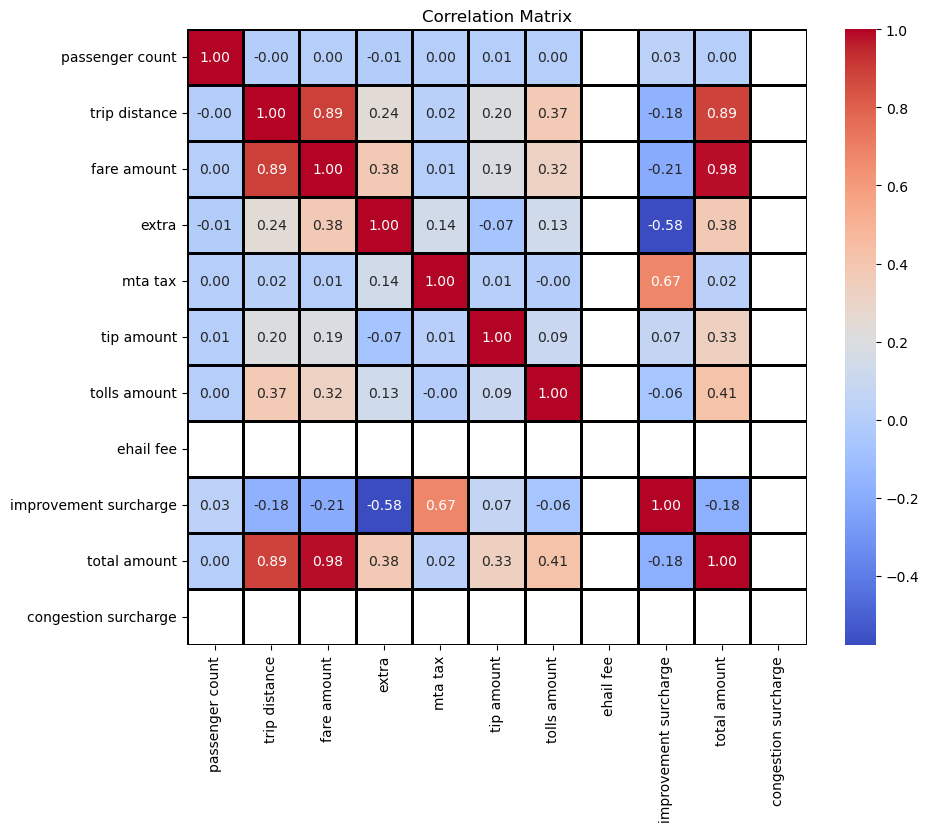

In [68]:
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

### Conclusion
There is a strong correlation between fare amount , total amount , trip distance each one with the other two.

There is an intermediate relation between improvement surcharge and both extra and mtatax.

### 1- Fare Amount


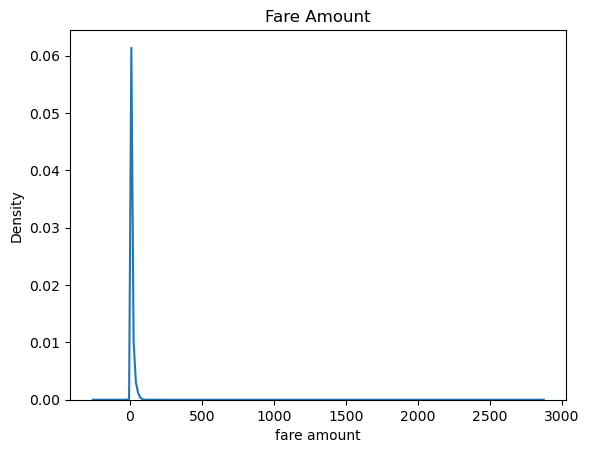

In [14]:
sns.kdeplot(df["fare amount"])
plt.title('Fare Amount')
plt.show()

In [20]:
(df["fare amount"]<0).sum()

1805

In [22]:
(df["fare amount"]==0).sum()

1156

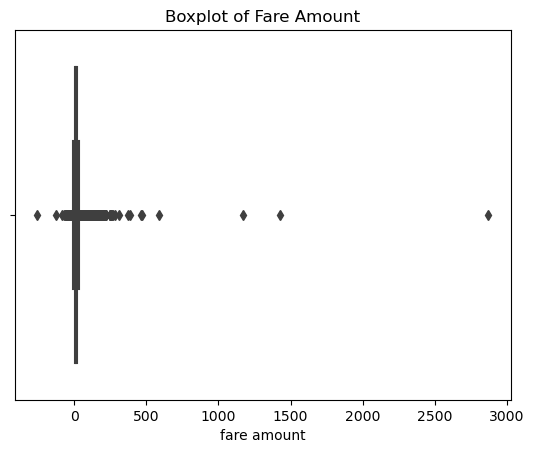

In [21]:
sns.boxplot(x='fare amount', data=df)
plt.title('Boxplot of Fare Amount')
plt.show()

In [43]:
df[df["fare amount"]>700]

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
156464,VeriFone Inc.,2018-08-09 00:00:00,2018-08-09 00:00:00,N,Standard rate,"Manhattan,Manhattanville","Bronx,Claremont/Bathgate",1.0,3.53,1171.0,0.5,0.5,0.0,0.0,NaN,0.3,1172.3,Cash,Street-hail,NaN
481925,VeriFone Inc.,2018-08-25 08:54:55,2018-08-25 08:54:55,N,Standard rate,"Brooklyn,Brooklyn Heights","Queens,Whitestone",3.0,151.13,1428.5,NaN,0.5,0.0,0.0,NaN,0.3,1429.3,Cash,Street-hail,NaN
649423,VeriFone Inc.,2018-08-31 11:57:00,2018-09-01 11:36:24,N,Standard rate,"Queens,Queensbridge/Ravenswood","Queens,Queensbridge/Ravenswood",5.0,0.00,2872.0,NaN,0.5,0.0,0.0,NaN,0.3,2872.8,Cash,Street-hail,NaN


### Conclusion
1- there is a problem with meter calculating the fare as it is sometimes (many times) smaller than or less than 0 which is illogical.

2- outliers on the large side also have some illogical data where trip time is 0 and distance is so large or the inverse (24 hours with 0 distance).

### 2- Trip Distance

In [41]:
f = "trip distance"
df[f].min(),df[f].max(),df[f].skew()

(0.0, 151.13, 2.874075115691434)

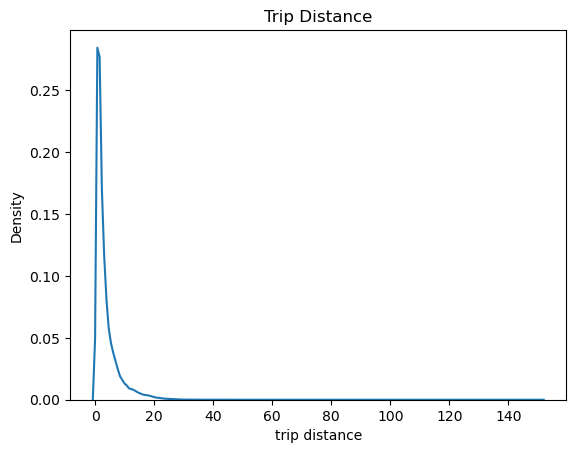

In [33]:
sns.kdeplot(df["trip distance"])
plt.title('Trip Distance')
plt.show()

In [51]:
(df["trip distance"]==0).sum()

7951

In [50]:
(df["trip distance"]<0).sum()

0

### Conclusion 
trip distance is right skewed.
in 7951 cases either taximeter is not working as it doesn't calculate distance or the passenger and the driver dont agree once the passenger starts running the taximeter.

### 3- Passenger Count

In [34]:
df["passenger count"].value_counts()

1.0      564562
2.0       52155
5.0       21913
6.0       12187
3.0       10354
4.0        3605
7.0          10
8.0           5
111.0         4
9.0           2
Name: passenger count, dtype: int64

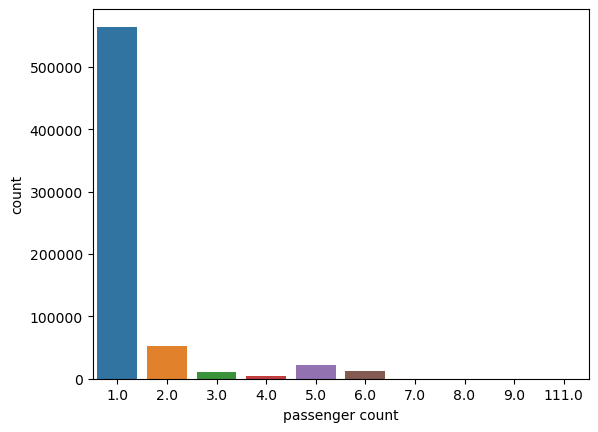

In [32]:
sns.countplot(df,x = 'passenger count')
plt.show()

### Conclusion
mostly 1 passenger count is only.from 2 to 6 are rarer, However 2 isnt too rare. 7 to 9 is so rare and is most probably an incorrect input as most drivers shouldn't accept this passenger count.111 is for sure an incorrect input.

### 4- Payment Type and Tip Amount

In [54]:
df["payment type"].value_counts()

Credit card    363310
Cash           278958
Unknown         10180
No charge        2747
Dispute          1311
Uknown             21
Name: payment type, dtype: int64

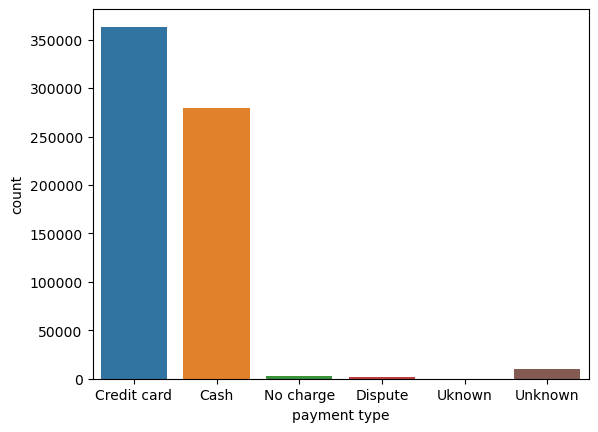

In [55]:
sns.countplot(df,x = 'payment type')
plt.show()

In [60]:
df[df["payment type"] == "Credit card"]["tip amount"].describe()

count    363310.000000
mean          1.750328
std           2.531221
min           0.000000
25%           0.000000
50%           1.360000
75%           2.550000
max         446.410000
Name: tip amount, dtype: float64

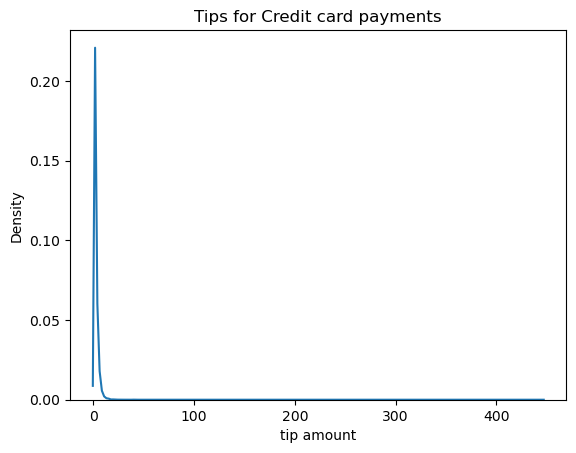

In [61]:
sns.kdeplot(df[df["payment type"] == "Credit card"]["tip amount"])
plt.title('Tips for Credit card payments')
plt.show()

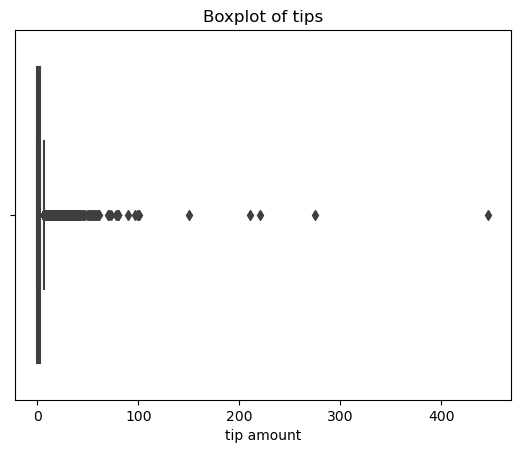

In [79]:
sns.boxplot(x='tip amount', data=df[df["payment type"] == "Credit card"])
plt.title('Boxplot of tips')
plt.show()

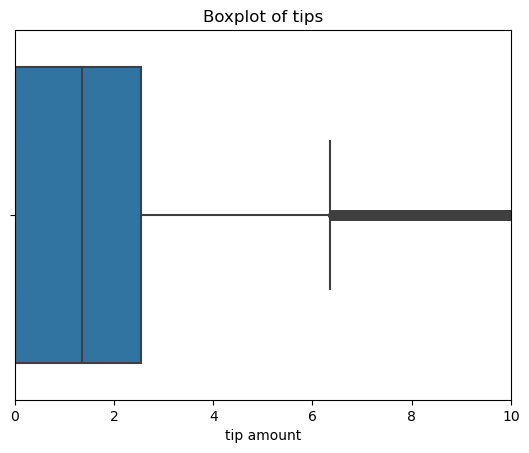

In [85]:
sns.boxplot(x='tip amount', data=df[df["payment type"] == "Credit card"] ,)
plt.title('Boxplot of tips')
plt.xlim(0,10)
plt.show()

In [68]:
df[df["payment type"] == "Credit card"]["tip amount"].mode()

0    0.0
Name: tip amount, dtype: float64

In [69]:
df[df["payment type"] == "Credit card"]["tip amount"].max()

446.41

In [83]:
df[df["payment type"] == "Credit card"]["tip amount"].quantile(0.85)

3.39

In [78]:
df[df["tip amount"] >= 50].shape[0]

43

In [70]:
df[df["tip amount"] == 446.41]

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
469646,VeriFone Inc.,2018-08-22 21:17:00,2018-08-22 21:17:49,N,Negotiated fare,"Queens,Jackson Heights","Queens,Jackson Heights",1.0,0.0,25.0,NaN,0.0,446.41,0.0,NaN,0.0,471.41,Credit card,Dispatch,NaN


### Conclusion 
1- most tips are small  (85% of tips are less than 3.4) can be deduced from boxplot too
2- most passengers dont give tips  (mode = 0)
3- the max tip is most probably incorrect data as distance is 0 and time is less than a minute which means there was no actual trip.

### 5- finding some relationships between feeatures and fair amount

In [97]:
df.nunique()

Vendor                        2
lpep pickup datetime     576465
lpep dropoff datetime    576720
store and fwd flag            2
Rate type                     7
PU Location                 238
DO Location                 259
passenger count              10
trip distance              3243
fare amount                4000
extra                        11
mta tax                       3
tip amount                 1631
tolls amount                 95
ehail fee                     0
improvement surcharge         3
total amount               6505
payment type                  6
trip type                     3
congestion surcharge          0
dtype: int64

In [113]:
grouped_data = df.groupby("trip type")["total amount"].mean().reset_index()

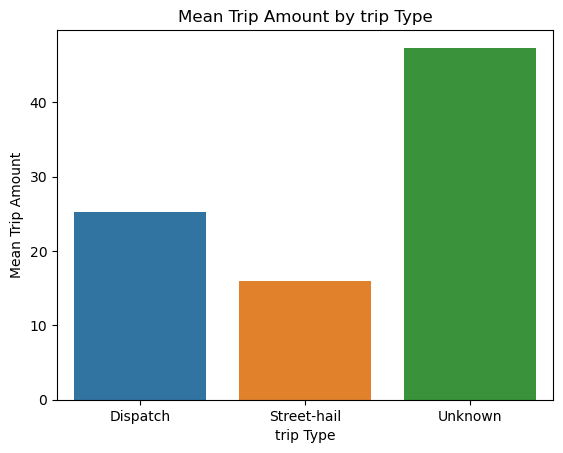

In [114]:
sns.barplot(x='trip type', y='total amount', data=grouped_data)
plt.xlabel('trip Type')
plt.ylabel('Mean Trip Amount')
plt.title('Mean Trip Amount by trip Type')
plt.show()

In [95]:
df.groupby("store and fwd flag")["total amount"].mean()

store and fwd flag
N    16.200343
Y    14.223769
Name: total amount, dtype: float64

In [98]:
df.groupby("Vendor")["total amount"].mean()

Vendor
Creative Mobile Technologies, LLC    14.93316
VeriFone Inc.                        16.97276
Name: total amount, dtype: float64

In [110]:
grouped_data = df.groupby("payment type")["total amount"].mean().reset_index()

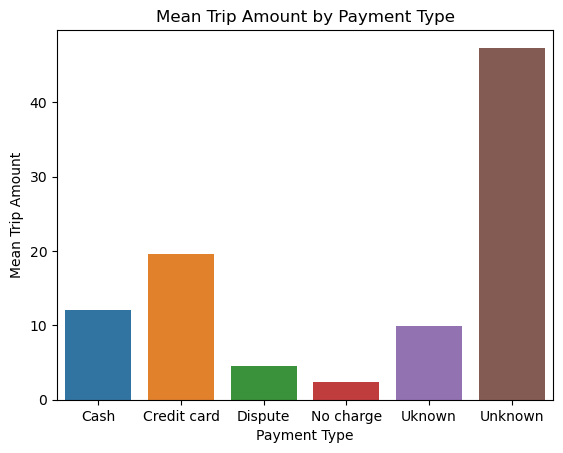

In [111]:
sns.barplot(x='payment type', y='total amount', data=grouped_data)
plt.xlabel('Payment Type')
plt.ylabel('Mean Trip Amount')
plt.title('Mean Trip Amount by Payment Type')
plt.show()

### Conclusion
1- Credit Card trips on average are of higher value
2- Dispatch trips are of higher value than street hail

# 3 - Cleaning Data

## Tidying up column names

## Observe inconsistent data

## Findings and conclusions

## Observing Missing Data

## Handling Missing data

## Findings and conclusions

## Observing outliers

## Handling outliers

## Findings and conclusions

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more features(feature eng.)

## 4.41 - Findings and concluisons

## 4.5 - Additional data extraction (GPS coordinates)

## 4.6 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet